In [1]:
import sys
sys.path.insert(0, '../classes')

from Model import Model as Model

import pickle


%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from importlib import reload

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    
params = {
 'grid.color': '.9',
 'axes.edgecolor': '.5',
 'text.color': '.3',
 'xtick.color': '.5',
 'xtick.direction': 'out',
 'xtick.major.size': 6.0,
 'xtick.minor.size': 3.0,
 'ytick.color': '.5',
 'ytick.direction': 'out',
 'ytick.major.size': 6.0,
 'ytick.minor.size': 3.0    
}
sns.set_style("whitegrid", params)

In [24]:
with open("GDP.p", "rb" ) as f:
    GDP = pickle.load(f)
    
with open("CPI.p", "rb" ) as f:
    CPI = pickle.load(f)
    
with open("emp.p", "rb" ) as f:
    emp = pickle.load(f)

In [25]:
agg = GDP+CPI+emp

def is_col_min(df):
    return df == df.min()

agg_is_min = is_col_min(agg)

agg

Loss               RMSE                           MAE                    
Periods ahead        1         4         12        1         4         12
BASE           3.000000  4.069107  5.145051  3.000000  3.825497  4.677102
AR             2.838675  3.544133  4.066642  2.670065  3.154550  3.443401
MA             2.962277  4.246163  4.281211  2.756940  3.650637  3.684024
ARMA           2.832609  3.511384  4.105611  2.603172  3.021567  3.461913
MSAR           2.843739  3.825377  4.665478  2.613754  3.503198  4.357167
SPLITAR        2.894210  3.641816  3.996614  2.677618  3.204244  3.739068
MLPAR          3.090331  3.631945  4.021213  2.896925  3.253892  3.506901
VAR            2.853327  3.581428  4.181177  2.651691  3.120319  3.584629
MSVAR          2.886111  3.517272  4.148988  2.667008  3.186115  3.553228
SPLITVAR       2.880980  3.618958  4.025890  2.748210  3.243670  3.759758
MLPVAR         2.906933  3.655585  4.349660  2.692139  3.221075  3.767950
FAVAR          2.856718  3.500203  4.124001  2.805372  3.192947  3.584002
MSFAVAR        2.746180  3.314890  3.950500  2.676198  3.056420  3.432377
SPLITFAVAR     2.811181  3.258661  4.014256  2.712237  2.969334  3.490646
MLPFAVAR       2.943671  3.713220  4.154475  2.862827  3.442146  3.713227

In [26]:
import io
from itertools import groupby

def process_val(val, i, j):
    if agg_is_min.iloc[i, j]: # is col min
        return '{\\color{red} \\textbf{' + str(round(val, 2)) + '}}'
    else:
        return str(round(val, 2))

def convertToLaTeX(df, alignment="c"):
    """
    Convert a pandas dataframe to a LaTeX tabular.
    Prints labels in bold, does not use math mode
    """
    first = list(df.columns.get_level_values(0))
    first_group = [(key, len(list(group))) for key, group in groupby(first)]
    second = list(df.columns.get_level_values(1))
    
    numColumns = df.shape[1]
    numRows = df.shape[0]
    output = io.StringIO()
    cols_align = "|".join(["%s" % (alignment * l) for key, l in first_group])
    colFormat = ("%s|%s" % ('l', cols_align))
    #Write header
    output.write("\\begin{tabular}{%s}\n" % colFormat)
    output.write('\\toprule\n')
        
    # top cols    
    columnLabels = ["\multicolumn{%i}{c}{%s}" % (l, label) for label, l in first_group]
    output.write("%s & %s\\\\\n" % (df.columns.names[0]," & ".join(columnLabels)))
    
    # second col
    columnLabels = ["%s" % label for label in second]
    output.write("%s & %s\\\\\\hline\n" % (df.columns.names[1]," & ".join(columnLabels)))

#     columnLabels = ["\\rot{ \\textbf{%s} }" % label for label in df.columns]
#     output.write("& %s\\\\\\hline\n" % " & ".join(columnLabels))
    #Write data lines
    for i in range(numRows):
        output.write("%s & %s\\\\\n"
                     % (df.index[i], " & ".join([process_val(df.iloc[i, j], i, j) for j in range(numColumns)])))
    #Write footer
    output.write("\\end{tabular}")
    return output.getvalue()

with open('../../latex/tabs/agg_losses.tex', "w" ) as f:
    f.write(convertToLaTeX(agg))

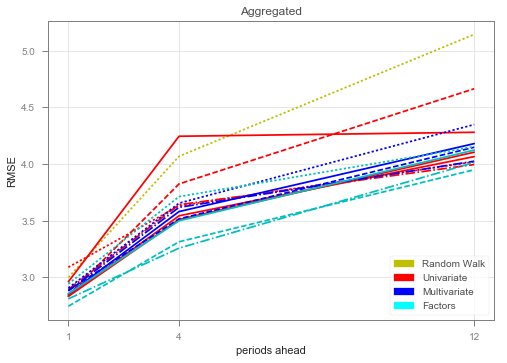

In [28]:
import matplotlib.patches as mpatches


df = agg['RMSE'].transpose()

plt.plot(df['BASE'], color='y', linestyle = ':')
plt.plot(df['AR'], color='r')
plt.plot(df['MA'], color='r')
plt.plot(df['ARMA'], color='r', linestyle = '-')
plt.plot(df['MSAR'], color='r', linestyle = '--')
plt.plot(df['SPLITAR'], color='r', linestyle = '-.')
plt.plot(df['MLPAR'], color='r', linestyle = ':')
plt.plot(df['VAR'], color='b', linestyle = '-')
plt.plot(df['MSVAR'], color='b', linestyle = '--')
plt.plot(df['SPLITVAR'], color='b', linestyle = '-.')
plt.plot(df['MLPVAR'], color='b', linestyle = ':')
plt.plot(df['FAVAR'], color='c', linestyle = '-')
plt.plot(df['MSFAVAR'], color='c', linestyle = '--')
plt.plot(df['SPLITFAVAR'], color='c', linestyle = '-.')
plt.plot(df['MLPFAVAR'], color='c', linestyle = ':')

plt.xticks([1, 4, 12])
plt.xlabel('periods ahead')
plt.ylabel('RMSE')

RW = mpatches.Patch(color='y', label='Random Walk')
uni = mpatches.Patch(color='red', label='Univariate')
multi = mpatches.Patch(color='blue', label='Multivariate')
factors = mpatches.Patch(color='cyan', label='Factors')



plt.legend(handles=[RW, uni, multi, factors], loc='lower right', frameon=True)

plt.title('Aggregated')
plt.savefig('../../latex/plots/agg_all.eps', format='eps', dpi=200)